In [2]:
# Si hizo una instalación local, puede omitir esta celda
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=9433a20c84a733fc13141bd5c7c2efad054af6801a67fdd8e0eb41ca1d7fe6c7
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 600.2 kB/s eta 0:00:00


In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
import numpy as np

In [4]:
from qiskit_aer import AerSimulator
backend =  AerSimulator(method='statevector')

# El protocolo de teletransportación cuántica

## Información preliminar:

Podemos agregar la instrucción *if* como en el siguiente ejemplo.

**En el simulador** podemos recuperar el estado del sistema, usando el método *save_statevector*.



In [5]:
qr = QuantumRegister(1,'quantum')
cr = ClassicalRegister(1,'classical')
qc = QuantumCircuit(qr,cr)
qc.x(0)

qc.measure(qr,cr)

# El siguiente fragmento de código crea una compuerta X,
# si el resultado de la medición de qr es 1; es decir,
# si cr == 1

with qc.if_test((cr,1)):
    qc.x(0)

# Si no medimos nuevamente, obtendremos en "resultados",
# (ver siguiente celda) el valor de la medición previa

qc.measure(qr,cr)

qc.draw('mpl')

qc.save_statevector()

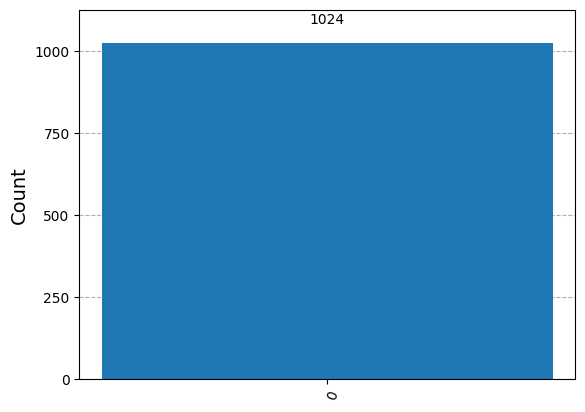

In [6]:
job = backend.run(qc,shots=1024)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

In [20]:
# Podemos leer el estado final de la simulación

resultados.get_statevector()

Statevector([ 0.+0.0000000e+00j, -0.+0.0000000e+00j,  0.+0.0000000e+00j,
              0.+0.0000000e+00j, -0.+0.0000000e+00j, -0.+0.0000000e+00j,
             -0.+0.0000000e+00j,  1.-1.2246468e-16j],
            dims=(2, 2, 2))


## Protocolo de teletransportación cuántica

### Inicializamos el circuito.

$\bullet$ $\psi$ es el qubit a teletransportar.

$\bullet$ $A$ es el qubit de Alice en el estado de Bell.

$\bullet$ $B$ es el qubit de Bob en el estado de Bell.

$\bullet$ $A_{psi}$ es el bit clásico donde Alice mide a $|\psi\rangle$

$\bullet$ $A_{bell}$ es el bit clásico donde Alice mide su qubit de Bell.

In [8]:
psi = QuantumRegister(1, "\psi")
A = QuantumRegister(1, "A")
B = QuantumRegister(1, "B")
A_psi = ClassicalRegister(1, "$A_{\psi}$")
A_bell = ClassicalRegister(1, "$A_{bell}$")

qc = QuantumCircuit(psi, A, B, A_psi, A_bell)

Preparamos el estado $$|\Phi^+\rangle=\frac{1}{\sqrt{2}}\big(|00\rangle+|11\rangle\big)$$

In [9]:
qc.h(A)
qc.cx(A, B)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, '\psi'), 0), Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

Alice opera con el qubit que desea enviar y su qubit en el estado de Bell:

In [10]:
qc.cx(psi, A)
qc.h(psi)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, '\psi'), 0), Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

Alice mide sus qubits:

In [11]:
qc.measure(A, A_bell)
qc.measure(psi, A_psi)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, '\psi'), 0), Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

Bob aplica las acciones necesarias, dependiendo de lo que Alice le indique

In [12]:
with qc.if_test((A_bell, 1)):
    qc.x(B)
with qc.if_test((A_psi, 1)):
    qc.z(B)

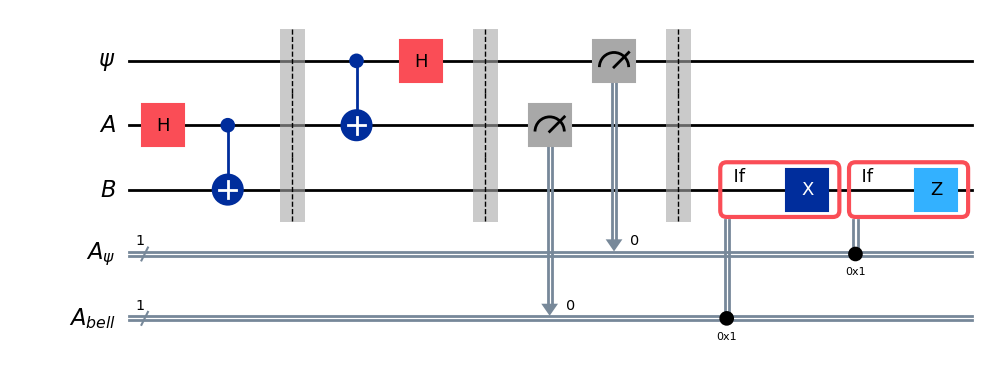

In [13]:
qc.draw('mpl')

Vamos a inicializar el qubit $|\psi\rangle$ en el estado $|1\rangle$
para verificar la implementación.

Aprovechamos para ver la opción *compose* en circuitos.

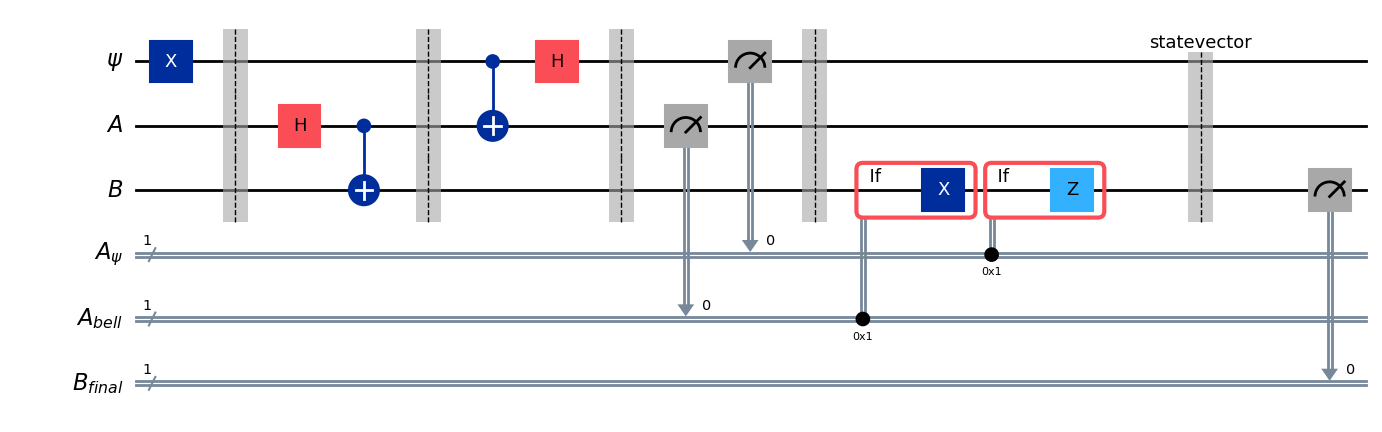

In [14]:
qc_prueba = QuantumCircuit(psi, A, B, A_psi, A_bell)

# qc_pruba inicia a psi en el estado |1>

qc_prueba.x(psi)
qc_prueba.barrier()


# Unimos los circuitos

qc_prueba = qc_prueba.compose(qc)

qc_prueba.save_statevector()

# Bob mide su qubit

B_final = ClassicalRegister(1, "$B_{final}$")
qc_prueba.add_register(B_final)
qc_prueba.measure(B, B_final)

qc_prueba.draw('mpl')

Simulamos el circuito

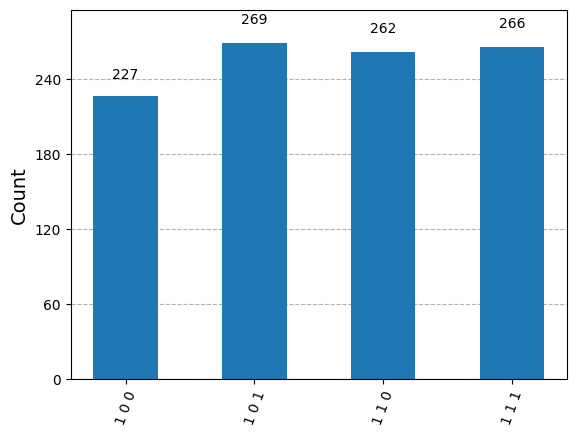

In [15]:
job = backend.run(qc_prueba,shots=1024)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

In [16]:
resultados.get_statevector()

Statevector([ 0.+0.0000000e+00j, -0.+0.0000000e+00j,  0.+0.0000000e+00j,
              0.+0.0000000e+00j, -0.+0.0000000e+00j, -0.+0.0000000e+00j,
             -0.+0.0000000e+00j,  1.-1.2246468e-16j],
            dims=(2, 2, 2))


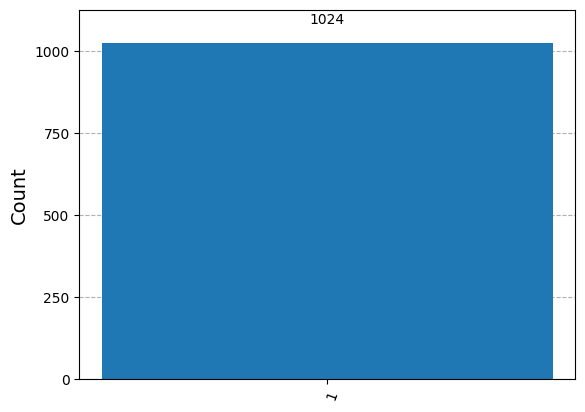

In [17]:
filtered_statistics = marginal_distribution(resultados.get_counts(), [2])
display(plot_histogram(filtered_statistics))

$\bullet$ Verifique el circuito para el estado $|-\rangle$, usando qiskit o el quantum composer.